<a href="https://colab.research.google.com/github/marcocaramanti/MLPNS_MCaramanti/blob/main/titanictree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline

# os serve per comunicare comandi da Python al sistema operativo
# json è un formato file human-readble e machine-readble. Ha una struttura
# simile a un dizionario di Python

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [6]:
ls -l *kaggle*

-rw------- 1 root root 70 Apr 13 15:11 kaggle.json


In [7]:
!chmod 600 kaggle.json

In [8]:
ls -l *kaggle*

-rw------- 1 root root 70 Apr 13 15:11 kaggle.json


In [9]:
envs = json.load(open("kaggle.json", "r"))

In [10]:
envs.keys()

dict_keys(['username', 'key'])

In [11]:
os.environ
# È un dizionario con tutte le environment variable (es che tipo di shell si
# usa, ecc.) Di solito non ce ne preoccupiamo perché sono settate dal OS

environ{'SHELL': '/bin/bash',
        'NV_LIBCUBLAS_VERSION': '11.11.3.6-1',
        'NVIDIA_VISIBLE_DEVICES': 'all',
        'COLAB_JUPYTER_TRANSPORT': 'ipc',
        'NV_NVML_DEV_VERSION': '11.8.86-1',
        'NV_CUDNN_PACKAGE_NAME': 'libcudnn8',
        'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events',
        'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.16.2-1+cuda11.8',
        'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.16.2-1',
        'VM_GCE_METADATA_HOST': '169.254.169.253',
        'HOSTNAME': 'd90bb8dad6c1',
        'TBE_RUNTIME_ADDR': '172.28.0.1:8011',
        'GCE_METADATA_TIMEOUT': '3',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=11.8 brand=tesla,driver>=450,driver<451 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=q

In [12]:
# Vogliamo però aggiungere una env variable
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [13]:
# A questo punto possiamo accedere a kaggle

In [14]:
!kaggle --version

Kaggle API 1.5.13


In [15]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6377        245  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2191         55  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2312         47  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [16]:
!kaggle datasets list -s titanic

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
heptapod/titanic                                    Titanic                                         11KB  2017-05-16 08:14:22          53852        993  0.7058824        
brendan45774/test-file                              Titanic dataset                                 11KB  2021-12-02 16:11:42          54688        538  1.0              
azeembootwala/titanic                               Titanic                                         12KB  2017-06-05 12:14:37          16191        162  0.8235294        
rahulsah06/titanic                                  Titanic                                         34KB  2019-09-16 14:43:23           5617     

In [17]:
cd MLPNS2023

/content/gdrive/My Drive/MLPNS2023


In [ ]:
!mkdir kaggleTitanic

In [18]:
cd kaggleTitanic

/content/gdrive/My Drive/MLPNS2023/kaggleTitanic


In [19]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [21]:
'''
Solitamente nelle kaggle challenges c'è un training set che viene fornito per
realizzare il programma e un test set che viene usato per valutare la
soluzione ma non reso pubblico per evitare di fare fine tuning.
Noi useremo solo train.csv e lo divideremo in train e test
'''

"\nSolitamente nelle kaggle challenges c'è un training set che viene fornito per\nrealizzare il programma e un test set che viene usato per valutare la\nsoluzione ma non reso pubblico per evitare di fare fine tuning.\nNoi useremo solo train.csv e lo divideremo in train e test\n"

In [22]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
# Noi usiamo solo alcune colonne
titanic = titanic[['Pclass', 'Sex', 'Age']]
titanic.shape

(891, 3)

In [25]:
titanic.describe()

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [26]:
titanic["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [27]:
# Dal describe vediamo che mancano dati. Togliamo le righe non complete
titanic.dropna(inplace=True)

<ipython-input-27-440be2b69927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace=True)


In [28]:
titanic.describe()

,Pclass,Age
count,714.000000,714.000000
mean,2.236695,29.699118
std,0.838250,14.526497
min,1.000000,0.420000
25%,1.000000,20.125000
50%,2.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [29]:
# Sostituiamo gender con una variabile binaria.
# Map prende in argomento una funzione o un dizionario

titanic["gender"] = titanic["Sex"].map({"male":0, "female":1})

<ipython-input-29-009ccdd8aa2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["gender"] = titanic["Sex"].map({"male":0, "female":1})


In [30]:
titanic

,Pclass,Sex,Age,gender
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
885,3,female,39.0,1
886,2,male,27.0,0
887,1,female,19.0,1
889,1,male,26.0,0


In [31]:
# Useremo solo gender, quindi togliamo sex
titanic.drop("Sex", axis=1, inplace=True)

<ipython-input-31-1978b5bb2912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.drop("Sex", axis=1, inplace=True)


In [ ]:
# Qui non facciamo whitening/standardizzazione perché le variabili vengono
# trattate una alla volta

In [32]:
from sklearn import tree


In [33]:
clf = tree.DecisionTreeClassifier(random_state=22, max_depth=5)

In [34]:
# Per fare supervised learning ci serve anche "survived" e ci siamo dimenticati
# di tenerla. Rimediamo

titanic_target = pd.read_csv("train.csv")[["Survived", "Age",
                                           "Pclass", "Sex"]].dropna()
titanic_target

,Survived,Age,Pclass,Sex
0,0,22.0,3,male
1,1,38.0,1,female
2,1,26.0,3,female
3,1,35.0,1,female
4,0,35.0,3,male
...,...,...,...,...
885,0,39.0,3,female
886,0,27.0,2,male
887,1,19.0,1,female
889,1,26.0,1,male


In [35]:
titanic_target = titanic_target["Survived"]

In [36]:
clf.fit(titanic.values, titanic_target.values)

DecisionTreeClassifier(max_depth=5, random_state=22)

In [37]:
# Guardiamo come ottenere le metriche

clf.score(titanic.values, titanic_target.values)
# Ci dà l'accuratezza del modello

0.8263305322128851

In [38]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=titanic.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data)

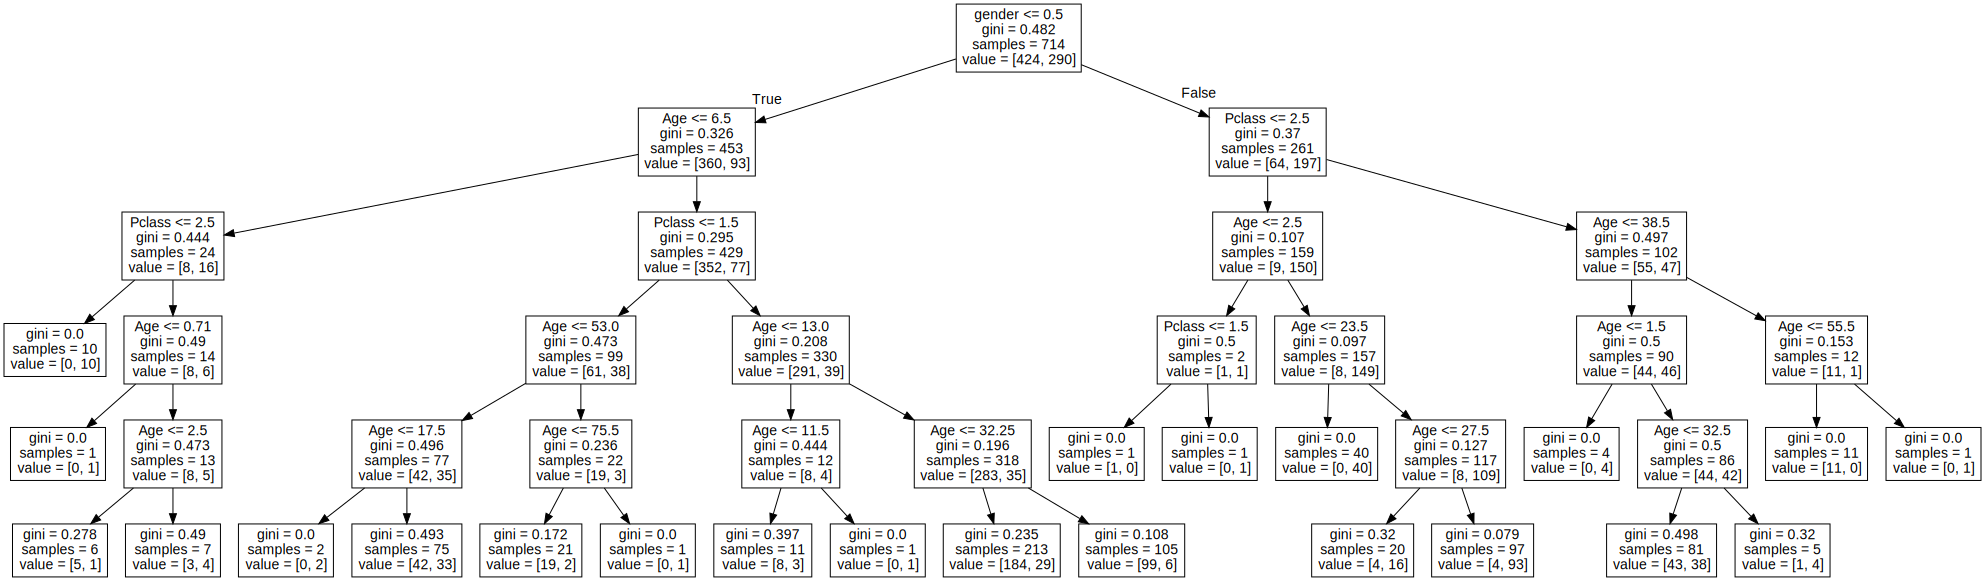

In [39]:
graph

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(titanic.values, titanic_target.values, test_size=0.2)

In [42]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=22)

In [45]:
# Performance sul training set

clf.score(X_train, y_train)

0.8458844133099825

In [46]:
# Performance sul test set

clf.score(X_test, y_test)

0.7202797202797203

In [47]:
# Se la performance sul test set è molto peggiore di quella sul training set,
# c'è stato overfitting. In tal caso occorre cambiare gli hyperparameters

In [48]:
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=222)

In [49]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=222)

In [50]:
clf2.score(X_train, y_train)

0.819614711033275

In [51]:
clf2.score(X_test, y_test)

0.7062937062937062

In [52]:
clf0 = tree.DecisionTreeClassifier(random_state=222).fit(X_train, y_train)

In [53]:
clf0.score(X_train, y_train)

0.8966725043782837

In [54]:
clf0.score(X_test, y_test)

0.7972027972027972